In [2]:
#Rebecca Lewis
#Week 1
#Python Charts

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
hotdogs = pd.read_csv('ex1-2/hotdog-places_csv.csv')

In [15]:
hotdogs

,Place,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,First,25,50.0,50.5,44.5,53.5,49,54,66,59,68.0,54
1,Second,24,31.0,26.0,30.5,38.0,37,52,63,59,64.5,43
2,Third,22,23.5,25.5,29.5,32.0,32,37,49,42,55.0,37


In [26]:
hotdogs_long = pd.melt(hotdogs, id_vars = ['Place'], value_vars=['2000', '2001', '2002', '2003', '2004', '2005', 
                                                    '2006', '2007', '2008', '2009', '2010'] )

#hotdogs_long
# #create summary tables by year and place
hotdog_year = hotdogs_long.groupby(['variable']).sum().reset_index()
hotdog_place = hotdogs_long.groupby(['Place']).sum().reset_index()
hotdog_year_place = hotdogs_long.groupby(['Place','variable']).sum().reset_index()

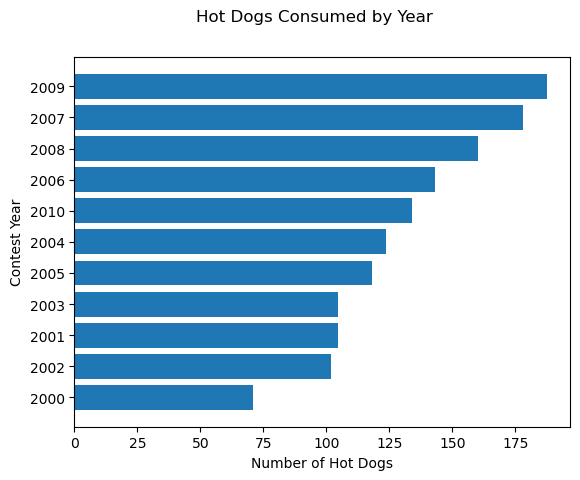

In [37]:
plt.rcdefaults()
fig, ax = plt.subplots()

#sort descending
hotdog_year = hotdog_year.sort_values(by=['value'], ascending=True)

plt.barh(hotdog_year['variable'], hotdog_year['value'])
ax.set_xlabel('Number of Hot Dogs')
ax.set_ylabel('Contest Year')
fig.suptitle('Hot Dogs Consumed by Year')

plt.show()

In [38]:
hotdog_year_place

,Place,variable,value
0,First,2000,25.0
1,First,2001,50.0
2,First,2002,50.5
3,First,2003,44.5
4,First,2004,53.5
5,First,2005,49.0
6,First,2006,54.0
7,First,2007,66.0
8,First,2008,59.0
9,First,2009,68.0


In [129]:
first = hotdog_year_place[hotdog_year_place['Place']=='First'].iloc[:, 2:3]
second = hotdog_year_place[hotdog_year_place['Place']=='Second'].iloc[:, 2:3].reset_index()
second.drop(['index'], inplace=True, axis=1)
third = hotdog_year_place[hotdog_year_place['Place']=='Third'].iloc[:, 2:3].reset_index()
third.drop(['index'], inplace=True, axis=1)
first, second, third


(    value
 0    25.0
 1    50.0
 2    50.5
 3    44.5
 4    53.5
 5    49.0
 6    54.0
 7    66.0
 8    59.0
 9    68.0
 10   54.0,
     value
 0    24.0
 1    31.0
 2    26.0
 3    30.5
 4    38.0
 5    37.0
 6    52.0
 7    63.0
 8    59.0
 9    64.5
 10   43.0,
     value
 0    22.0
 1    23.5
 2    25.5
 3    29.5
 4    32.0
 5    32.0
 6    37.0
 7    49.0
 8    42.0
 9    55.0
 10   37.0)

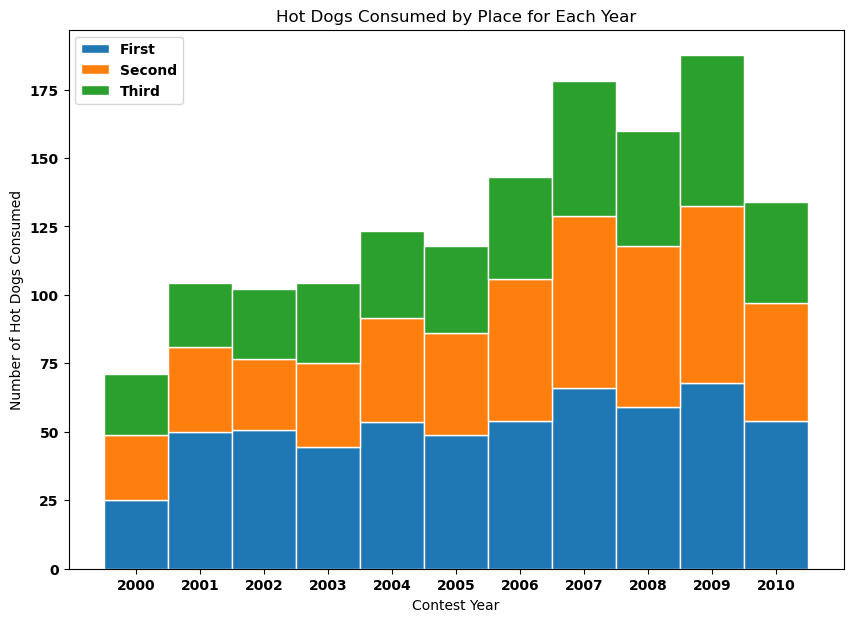

In [136]:
from matplotlib import rc

# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = first['value']
bars2 = second['value']
bars3 = third['value']
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = first.index.tolist()
 
# Names of group and bar width
names = hotdog_year_place['variable']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, edgecolor='white', width=barWidth, label='First')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, edgecolor='white', width=barWidth, label='Second')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, edgecolor='white', width=barWidth, label='Third')
 
# Custom X axis
plt.title('Hot Dogs Consumed by Place for Each Year')
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Contest Year")
plt.ylabel('Number of Hot Dogs Consumed')
plt.legend()
 
# Show graphic
plt.show()


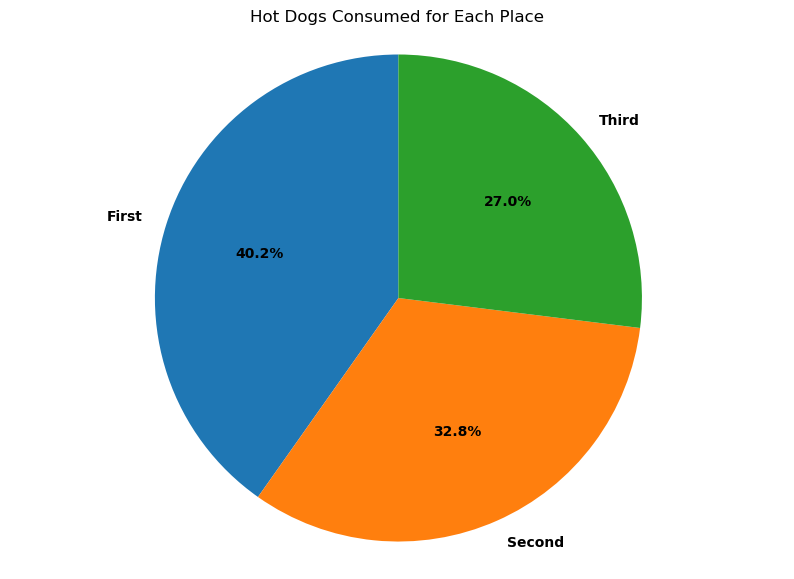

In [138]:
#pie chart
sizes = hotdog_place['value']
labels = hotdog_place['Place']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Hot Dogs Consumed for Each Place')
plt.show()

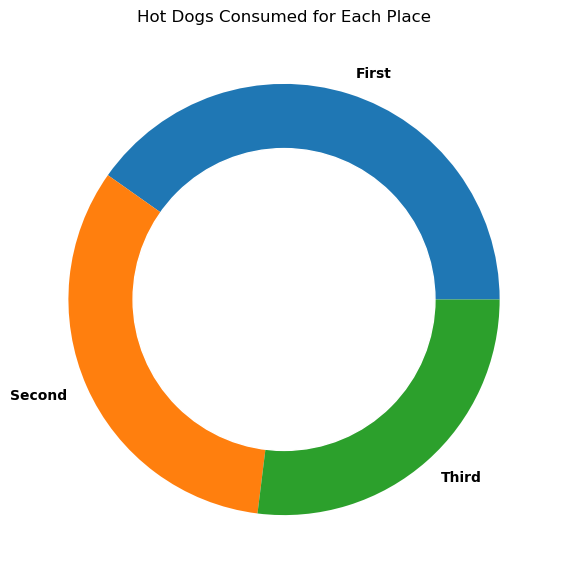

In [137]:
#donut chart
# create data
names=hotdog_place['Place']
size=hotdog_place['value']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(size, labels=names)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Hot Dogs Consumed for Each Place')
plt.show()
